In [1]:
# Notebooks
import nbimporter
import os
import sys

# Functions from src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Defined Functions
from utils import *
# from utils import *

# Pandas, matplotlib, pickle, seaborn
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
datasets = ["occutherm", "cresh", "ashrae"]
models = ["smote", "adasyn", "tgan", "ctgan"]
models_axes_baseline = ["Baseline", "SMOTE", "ADASYN", "TGAN", "CTGAN"]


# Variability of generated samples

![accuracy](images/validation_variability.jpeg)

[52.50489290173811, 49.30198172804137, 49.45585533656176, 42.798922238594365, 62.85135236733591]
[175.32225407429758, 161.1250641108732, 186.6134073252298, 142.25611651209627, 159.27250264973452]
[18.12202905181786, 17.90157018784377, 17.758499248305387, 17.988431338914758, 17.404704687341308]
[[52.50489290173811, 49.30198172804137, 49.45585533656176, 42.798922238594365, 62.85135236733591], [175.32225407429758, 161.1250641108732, 186.6134073252298, 142.25611651209627, 159.27250264973452], [18.12202905181786, 17.90157018784377, 17.758499248305387, 17.988431338914758, 17.404704687341308]]


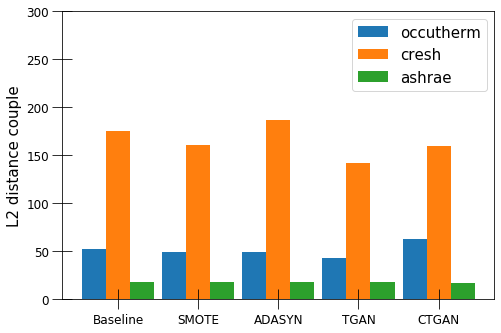

In [3]:
var_all_datasets = []

for dataset in datasets:
    variability_all = []
    var_baseline = pickle.load(open("metrics/" + dataset + "_variability_baseline.pkl", "rb"))
    variability_all.append(var_baseline)

    for model in models:
        if model == "comfortGAN":
            metric_str = "metrics/" + dataset + "-" + experiment_name + "_variability_" + model + ".pkl"
        else:
            metric_str = "metrics/" + dataset + "_variability_" + model + "_trials.pkl"
        var = pickle.load(open(metric_str, "rb"))
        variability_all.append(var)
    
    print(variability_all)
        
    var_all_datasets.append(variability_all)

print(var_all_datasets)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(len(models_axes_baseline))  # the label locations
width = 0.3  # the width of the bars

ax.bar(x - width, var_all_datasets[0], width, label='occutherm')
ax.bar(x,var_all_datasets[1], width, label='cresh')
ax.bar(x + width,var_all_datasets[2], width, label='ashrae')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set(ylim=(0, 300))
ax.set_xticks(x)
ax.set_xticklabels(models_axes_baseline)
ax.tick_params(length=20, direction="inout", labelsize='large')
ax.set_ylabel('L2 distance couple', size=15)
ax.legend(prop={'size': 15})

plt.show()

# higher the better and close to baseline (each row is one dataset)


# Diversity of generated samples

![accuracy](images/validation_diversity.jpeg)

[1.8966552371208951, 1.9404514358168596, 2.523659894947721, 15.582569084676189, 23.924874234027772]
[5.6614872565810765, 2.7659709504337244, 3.257694883884269, 12.104272638123359, 19.80012186464539]
[0.554039133125188, 0.29420071973683615, 0.2951971917308636, 0.893641398969707, 1.1698938670760566]
[[1.8966552371208951, 1.9404514358168596, 2.523659894947721, 15.582569084676189, 23.924874234027772], [5.6614872565810765, 2.7659709504337244, 3.257694883884269, 12.104272638123359, 19.80012186464539], [0.554039133125188, 0.29420071973683615, 0.2951971917308636, 0.893641398969707, 1.1698938670760566]]


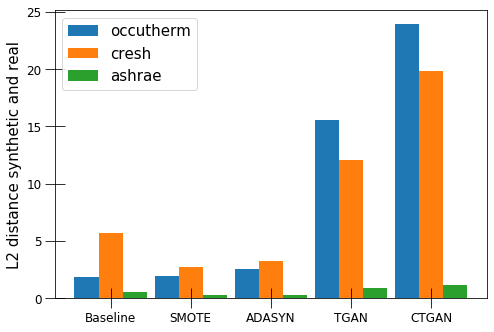

In [4]:
diversity_all_datasets = []

for dataset in datasets:
    diversity_all = []
    div_baseline = pickle.load(open( "metrics/" + dataset + "_diversity_baseline.pkl", "rb" ))
    diversity_all.append(div_baseline)

    for model in models:
        if model == "comfortGAN":
            metric_str = "metrics/" + dataset + "-" + experiment_name + "_diversity_" + model + ".pkl"
        else:
            metric_str = "metrics/" + dataset + "_diversity_" + model + "_trials.pkl"
        div = pickle.load(open( metric_str, "rb" ))
        diversity_all.append(div)

    print(diversity_all) 
    
    diversity_all_datasets.append(diversity_all)
    
print(diversity_all_datasets)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(len(models_axes_baseline))  # the label locations
width = 0.3  # the width of the bars

ax.bar(x - width, diversity_all_datasets[0], width, label='occutherm')
ax.bar(x, diversity_all_datasets[1], width, label='cresh')
ax.bar(x + width, diversity_all_datasets[2], width, label='ashrae')

# ax.set(ylim=(0, 40))
ax.set_xticks(x)
ax.set_xticklabels(models_axes_baseline)
ax.tick_params(length=20, direction="inout", labelsize='large')
ax.set_ylabel('L2 distance synthetic and real', size=15)
ax.legend(prop={'size': 15})

plt.show()

# higher the better and close to baseline (each row is one dataset)


# Quality of the final Classification

![accuracy](images/validation_classification.jpeg)

[0.6, 0.4648777579010137, 0.40816935002981514, 0.6209302325581395, 0.47996422182468695]
[0.65, 0.5308994708994709, 0.5147089947089947, 0.6578835978835978, 0.6326984126984128]
[0.2628012048192771, 0.30446117804551537, 0.300404953145917, 0.37954484605087013, 0.4012248995983936]
[[0.6, 0.4648777579010137, 0.40816935002981514, 0.6209302325581395, 0.47996422182468695], [0.65, 0.5308994708994709, 0.5147089947089947, 0.6578835978835978, 0.6326984126984128], [0.2628012048192771, 0.30446117804551537, 0.300404953145917, 0.37954484605087013, 0.4012248995983936]]


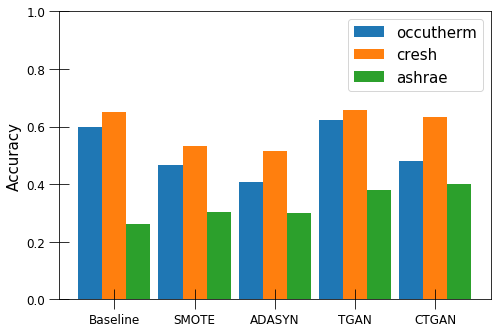

In [5]:
class_acc_all_dasets = []

for dataset in datasets:
    class_acc_all = []
    class_acc_baseline = pickle.load(open( "metrics/" + dataset + "_rdf_classification_baseline.pkl", "rb" ))
    class_acc_all.append(class_acc_baseline)

    for model in models:
        if model == "comfortGAN":
            metric_str = "metrics/" + dataset + "-" + experiment_name + "_classification_test_" + model + ".pkl"
        else:
            metric_str = "metrics/" + dataset + "_classification_" + model + "_trials.pkl"
        class_acc = pickle.load(open( metric_str, "rb" ))
        class_acc_all.append(class_acc[3])

    print(class_acc_all) 
    class_acc_all_dasets.append(class_acc_all)
    
print(class_acc_all_dasets)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(len(models_axes_baseline))  # the label locations
width = 0.3  # the width of the bars

ax.bar(x - width, class_acc_all_dasets[0], width, label='occutherm')
ax.bar(x, class_acc_all_dasets[1], width, label='cresh')
ax.bar(x + width, class_acc_all_dasets[2], width, label='ashrae')

ax.set(ylim=(0, 1))
ax.set_xticks(x)
ax.set_xticklabels(models_axes_baseline)
ax.tick_params(length=20, direction="inout", labelsize='large')
ax.set_ylabel('Accuracy', size=15)
ax.legend(prop={'size': 15})

plt.show()
    
# higher the better and close to baseline (each row is one dataset)
